In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import os 
import pandas as pd
from skimage import io,img_as_float


In [2]:
source_folder = '/home/axtr7550/Chromosome_project/real_images/for_axel/'


In [9]:
image_coords = pd.read_csv(source_folder + 'fork_outputs/positions_df.csv')
with open(source_folder + 'fork_outputs/train_cell_masks.txt', 'r') as f:
    raw_image_names = f.readlines()
    


In [4]:
image_names = [name.strip().split('/')[-1] for  name in raw_image_names]
image_names = np.array(image_names) 

In [11]:
image_coords['img_name'] = image_names[image_coords['Image'].values.astype(int)-1]

In [12]:
image_coords

,Image,x,y,img_name
0,0,101,407,Pos10_img_101.tif
1,0,103,380,Pos10_img_101.tif
2,0,106,465,Pos10_img_101.tif
3,0,114,615,Pos10_img_101.tif
4,0,116,637,Pos10_img_101.tif
...,...,...,...,...
3396,19,915,734,Pos10_img_100.tif
3397,19,922,881,Pos10_img_100.tif
3398,19,968,865,Pos10_img_100.tif
3399,19,969,923,Pos10_img_100.tif


In [13]:
images = torch.zeros((20, 1041, 1302))

for i in range(20):
    img = io.imread(f'{source_folder}pool/{image_names[i]}').astype(np.int16)
    images[i, ...] = torch.tensor(img)[img.shape[0]//2:]

torch.Size([1041, 1302])


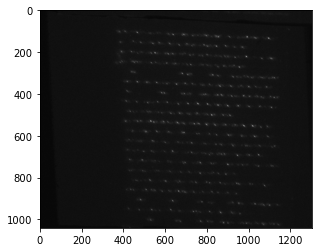

In [14]:
image = images[0]
plt.imshow(image, cmap='gray')
print(image.shape)

In [15]:
max_val , min_val = images.max(), images.min()

In [16]:
images_scaled = images/max_val


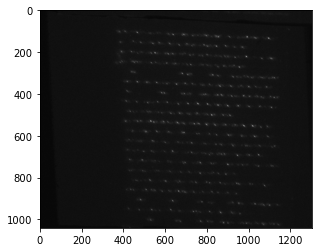

In [17]:
image = images[0, ...]
plt.imshow(image, cmap='gray')


In [12]:
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import Layout


In [14]:
slider =widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)


In [15]:
out = widgets.Output(layout=Layout(width='70%', height='300px'))
with out:
    fig, axs = plt.subplots()
    plt.show()
display(out)
display(slider)


Output(layout=Layout(height='300px', width='70%'))

IntSlider(value=3, description='Slider:', max=10)

In [16]:
def on_value_changed(val):
    with out:
        out.clear_output()
        i = slider.value
        image = images[i, ...]
        plt.imshow(image, cmap='gray', vmin=image.min(), vmax=image.max())
        plt.show()


In [16]:
slider.observe(on_value_changed, names='value')

Output()